<img src="https://rhyme.com/assets/img/logo-dark.png" align="center">

<h2 align="center"> Univariate Linear Regression </h2>

### Task 2: Load the Data and Libraries
---

In [1]:
import matplotlib.pyplot as plt 
plt.style.use('ggplot')
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd  
import seaborn as sns
plt.rcParams['figure.figsize'] = (12, 8)

In [3]:
dataset=pd.read_csv('bike_sharing_data.txt')
dataset.head()

,Population,Profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [4]:
#Now looking at the basic info of the dataset
print(dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97 entries, 0 to 96
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Population  97 non-null     float64
 1   Profit      97 non-null     float64
dtypes: float64(2)
memory usage: 1.6 KB
None


In [5]:
#Now let's look at the dataset's distribution
dataset.corr()

,Population,Profit
Population,1.000000,0.837873
Profit,0.837873,1.000000


### Task 3: Visualize the Data
---

Text(0.5, 1.0, 'Profit vs Population in respectively $100000 and 10000 scale')

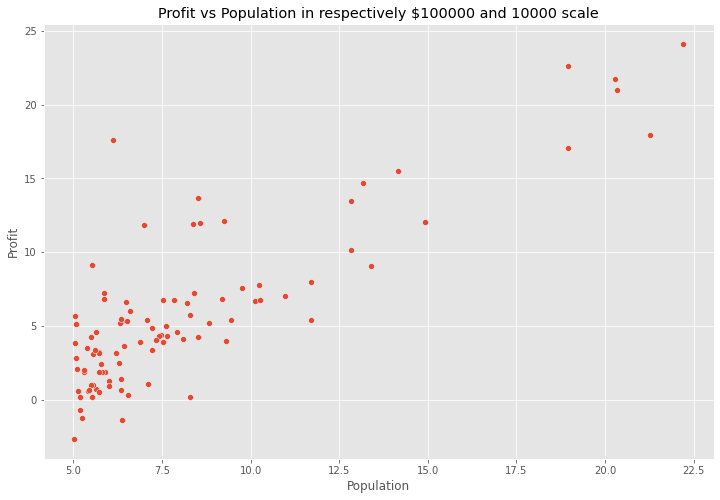

In [24]:
#Now we will try to visualize our dataset using seaborn library.
ax=sns.scatterplot(x='Population',y='Profit',data=dataset)
ax.set_title("Profit vs Population in respectively $100000 and 10000 scale")

### Task 4: Compute the Cost $J(\theta)$
---

The objective of linear regression is to minimize the cost function

$$J(\theta) = \frac{1}{2m} \sum_{i=1}^m (h_\theta(x^{(i)}) - y^{(i)} )^2$$

where $h_{\theta}(x)$ is the hypothesis and given by the linear model

$$h_{\theta}(x) = \theta^Tx = \theta_0 + \theta_1x_1$$

In [25]:
#Now defining the cost function and will run it 
def squared_cost(X,y,theta):
    """
    x->Input,y-output_labels and parameters is theta
    """
    m=len(y)
    h_theta=X.dot(theta)
    error=(h_theta-y)**2
    
    return 1/(2*m)*np.sum(error)

In [26]:
m=dataset.Population.values.size
#Converting to numpy array 1 is added for biasing
X=np.append(np.ones((m,1)),dataset.Population.values.reshape((m,1)),axis=1)
#print(X)
y=dataset.Profit.values.reshape((m,1))
theta=np.zeros((2,1))
#Now calling the cost function
print(squared_cost(X,y,theta))
print(theta)

32.072733877455676
[[0.]
 [0.]]


### Task 5: Gradient Descent
---

Minimize the cost function $J(\theta)$ by updating the below equation and repeat unitil convergence
        
$\theta_j := \theta_j - \alpha \frac{1}{m} \sum_{i=1}^m (h_{\theta}(x^{(i)}) - y^{(i)})x_j^{(i)}$ (simultaneously update $\theta_j$ for all $j$).

In [27]:
#Now we will write gradient descent algorithm for use
def gradient_descent(X,y,theta,alpha,iterations):
    n=len(y)
    cost=[]
    for i in range(iterations):
        y_pred=X.dot(theta)
        error=np.dot(X.transpose(),(y_pred-y))
        #print(error)
        theta-=alpha*error*1/n
        #print(theta)
        cost.append(squared_cost(X,y,theta))
    return theta,cost

In [28]:
theta,cost=gradient_descent(X,y,theta,alpha=0.001,iterations=10000)
print("Learned Parameter Theta",theta)

Learned Parameter Theta [[-3.24044334]
 [ 1.12719788]]


In [29]:
print("h(x)={}+{}x1".format(str(round(theta[0,0],5)),str(round(theta[1,0],6))))

h(x)=-3.24044+1.127198x1


### Task 6: Visualising the Cost Function $J(\theta)$
---

In [30]:
from mpl_toolkits.mplot3d import Axes3D

In [31]:
#Now we will literally create different combination of theta values to create a surface representation
theta1=np.linspace(-10,10,100)
theta2=np.linspace(-1,4,100)

cost_values=np.zeros((len(theta1),len(theta2)))
#Now creating combination
for i in range(len(theta1)):
    for j in range(len(theta2)):
        thetan=np.array([theta1[i],theta2[j]])
        cost_values[i,j]=squared_cost(X,y,thetan)

C:\Users\Shoumik\AppData\Local\Temp\ipykernel_6204\222787732.py:2: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax=fig.gca(projection='3d')
C:\Users\Shoumik\AppData\Local\Temp\ipykernel_6204\222787732.py:5: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  fig.colorbar(surf,shrink=0.5,aspect=5)


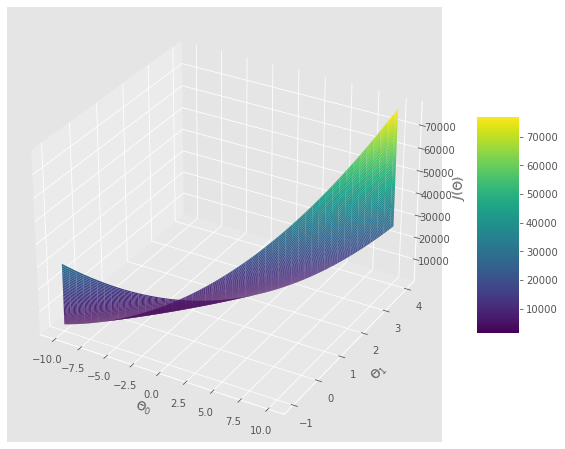

In [32]:
fig=plt.figure(figsize=(12,8))
ax=fig.gca(projection='3d')
#Now plotting surface
surf=ax.plot_surface(theta1,theta2,cost_values,cmap='viridis')
fig.colorbar(surf,shrink=0.5,aspect=5)

plt.xlabel("$\Theta_0$")
plt.ylabel("$\Theta_1$")
ax.set_zlabel("$J(\Theta)$")
ax.view_init(30,300)
plt.show()

### Task 7: Plotting the Convergence
---

Plot $J(\theta)$ against the number of iterations of gradient descent:

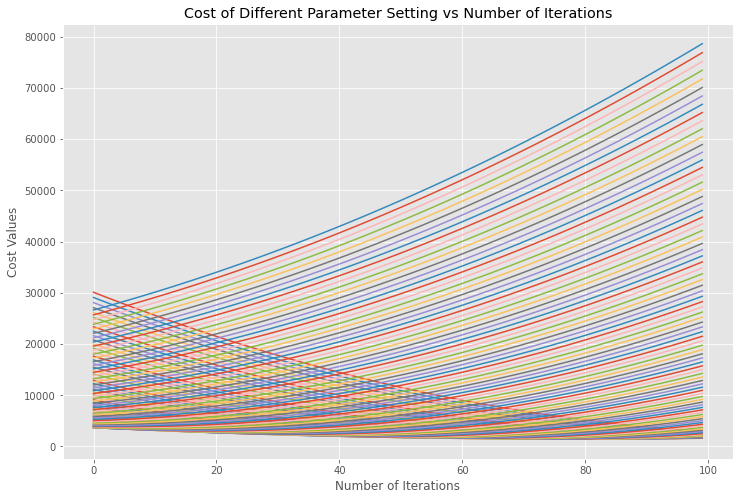

In [33]:
plt.plot(cost_values)
plt.xlabel("Number of Iterations")
plt.ylabel("Cost Values")
plt.title("Cost of Different Parameter Setting vs Number of Iterations")
plt.show()

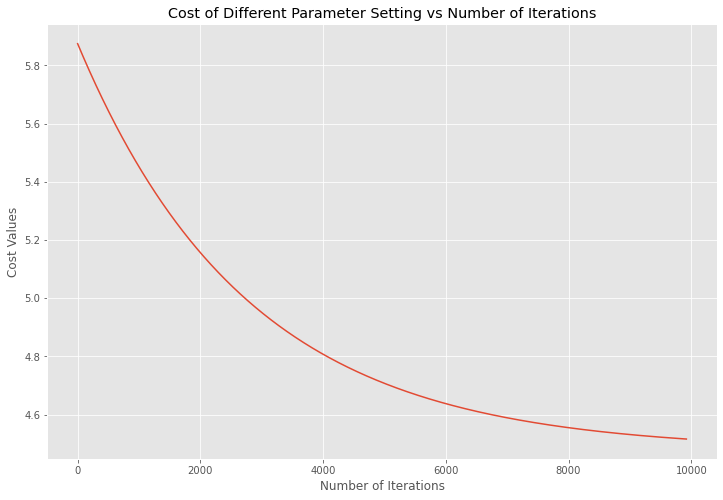

In [34]:
plt.plot(cost[80:])
plt.xlabel("Number of Iterations")
plt.ylabel("Cost Values")
plt.title("Cost of Different Parameter Setting vs Number of Iterations")
plt.show()

### Task 8: Training Data with Linear Regression Fit
---

(2,)


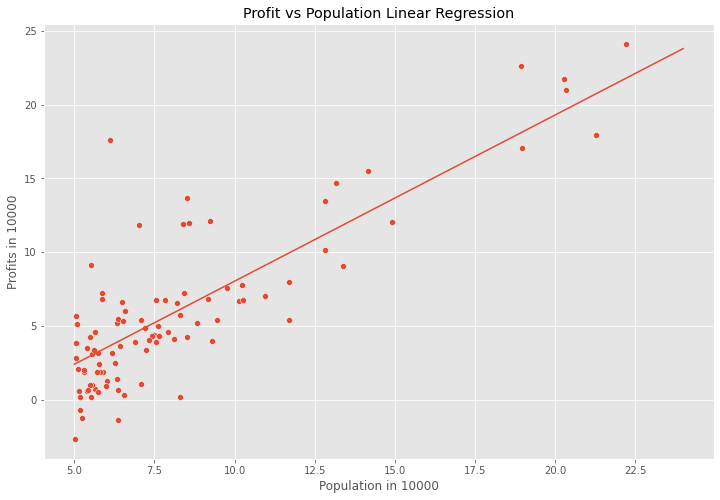

In [36]:
print(theta.shape)
#print(theta.shape)
theta=np.squeeze(theta)
sns.scatterplot(x='Population',y="Profit",data=dataset)

x_value=[x for x in range(5,25)]
y_value=[(theta[1]*x+theta[0]) for x in x_value]
sns.lineplot(x=x_value,y=y_value)
plt.xlabel("Population in 10000")
plt.ylabel("Profits in 10000")
plt.title("Profit vs Population Linear Regression")
plt.show()

### Task 9: Inference using the optimized $\theta$ values
---

$h_\theta(x) = \theta^Tx$

In [38]:
#Now trying to observe how our model behaves on random input
def predict(x,theta):
    y_pred=np.dot(x,theta)
    return y_pred

In [40]:
#Now calling and trying to view the result first column for bias second one for population
pred1=predict(np.array([1,4]),theta)*10000
print("For a population of 40000 predicted profit is: ",pred1)

For a population of 40000 predicted profit is:  12683.481817737978


In [42]:
pred2=predict(np.array([1,8.3]),theta)*10000
print("For a population of 830000 predicted profit is: ",pred2)

For a population of 830000 predicted profit is:  61152.99065490888
